# Nuclear Game - Analysis
Gabriel Emilio Herrera Oropeza <br>
13/06/2022

In [1]:
import ngtools.analyzer as ngt

## Data Processing
### Import data

In [2]:
path_to_experiments = "../data"
nga = ngt.NuclearGame_Analyzer(path_to_experiments)

## Accessing NGA data

In [3]:
nga.dim()

(180, 39)


In [4]:
nga.nrow()
nga.ncol()

180
39


In [5]:
nga.colnames()

Index(['cellID', 'avg_intensity_dapi', 'nuclear_area', 'nuclear_perimeter',
       'major_axis', 'minor_axis', 'axes_ratio', 'circularity', 'eccentricity',
       'solidity', 'x_pos', 'y_pos', 'angle', 'imageID',
       'avg_intensity_core_dapi', 'avg_intensity_internal_ring_dapi',
       'avg_intensity_external_ring_dapi', 'total_intensity_core_dapi',
       'total_intensity_internal_ring_dapi',
       'total_intensity_external_ring_dapi', 'total_intensity_dapi',
       'avg_intensity_beta3', 'total_intensity_beta3', 'avg_intensity_rfp',
       'total_intensity_rfp', 'avg_intensity_ngn', 'total_intensity_ngn',
       'beta3_x_rfp', 'beta3_x_ngn', 'rfp_x_ngn', 'beta3_x_rfp_x_ngn',
       'dna_peaks', 'dna_dots', 'dna_dots_size_median', 'spatial_entropy',
       'beta3_group', 'rfp_group', 'ngn_group', 'experiment'],
      dtype='object')


In [6]:
nga.showdata()

     cellID  avg_intensity_dapi  nuclear_area  nuclear_perimeter  major_axis  \
0         1                2452            99                 41        15.0   
1         2                1961            97                 39        12.9   
2         3                1545            19                 20         8.8   
3         4                1837            73                 35        13.1   
4         5                1536            27                 33        16.5   
..      ...                 ...           ...                ...         ...   
175     176                1359           157                 48        15.4   
176     177                1686           125                 42        15.0   
177     178                1335           115                 45        18.0   
178     179                1546            51                 31        12.7   
179     180                1425            46                 31        12.6   

     minor_axis  axes_ratio  circularit

In [7]:
nga.showdata(vars = ['cellID', 'avg_intensity_rfp'])

     cellID  avg_intensity_rfp
0         1                687
1         2                551
2         3                450
3         4                706
4         5                519
..      ...                ...
175     176                662
176     177                750
177     178                734
178     179                905
179     180                595

[180 rows x 2 columns]


## Plotting data

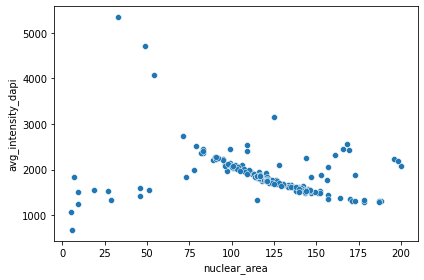

In [9]:
nga.plotData(x = "nuclear_area", y = "avg_intensity_dapi")

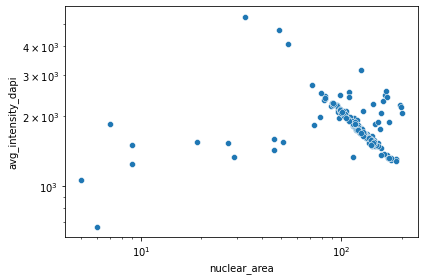

In [11]:
nga.plotData(x = "nuclear_area", y = "avg_intensity_dapi", x_trans = "log", y_trans = "log")

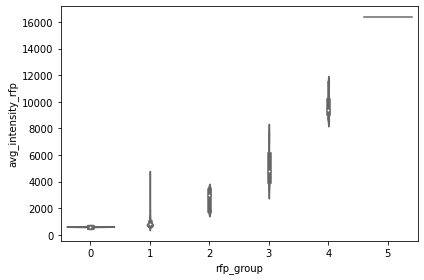

In [13]:
nga.plotData(x="rfp_group", y = "avg_intensity_rfp", plot_type = "violin")

### Center DAPI

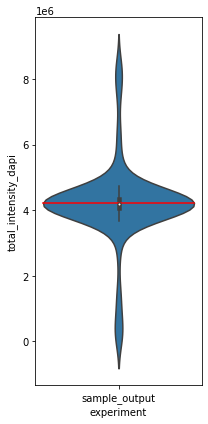

In [14]:
nga.ctrDAPI()

### Identify Single Cells
Identify single cells based on DNA marker content.

In [15]:
nga.findSingleCells()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 138.22it/s]


Check selection of single cells:

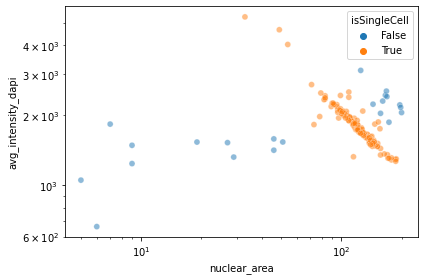

In [16]:
nga.plotData("nuclear_area", "avg_intensity_dapi", 
                hue = "isSingleCell", alpha = 0.5, 
                x_trans = "log", y_trans = "log")

In [17]:
# Keep only single cells
nga.filterCells(feature = "isSingleCell", op = "==", val = True)

In [18]:
nga.dim()

(158, 40)


### Intensity Normalisation
Statistic-based normalisation of intensity data. **Options are: mode, mean, and median.** *nbins* is used only when method is *mode*. DAPI channel is not normalised.

In [19]:
nga.normIntensity(method = "mode", nbins = 100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53.07it/s]


Observe data before normalisation for a channel. The red line represents the statistical method value used for normalisation.

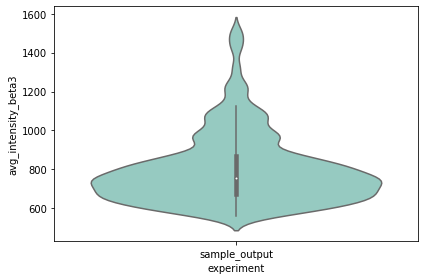

In [20]:
nga.plotData("experiment", "avg_intensity_beta3", plot_type = "violin")

## Data Exploration

### Linear relationships

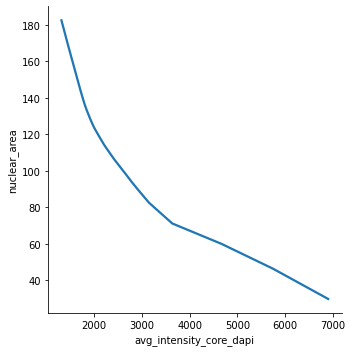

In [21]:
nga.plotData("avg_intensity_core_dapi", "nuclear_area", plot_type = "line")

### Dimension Reduction

In [22]:
nga.buildAnnData()
nga.normAnnData()

#### UMAP

In [23]:
nga.findNeighbours(method = "umap")
nga.findClusters(method = "leiden")
nga.runDimReduc(method = "umap")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


In [ ]:
# Plot UMAP showing features
nga.plotDim(hue = "avg_intensity_dapi")

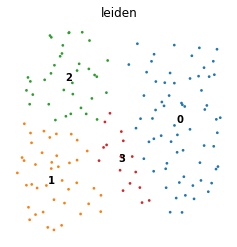

In [36]:
nga.plotDim(hue = "leiden")

#### DIFFMAP

In [37]:
nga.findNeighbours(method = "gauss")
nga.findClusters(method = "leiden")
nga.runDimReduc(method = "diffmap")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


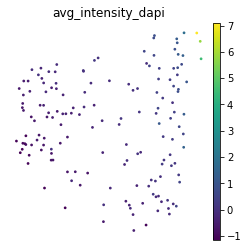

In [39]:
nga.plotDim(hue = "leiden")

#### Pseudotime
Choose a root cell for diffusion pseudotime:

In [45]:
nga.runPT(root = 0)

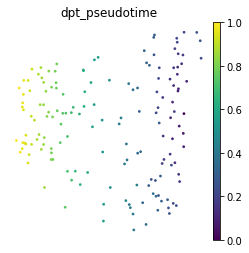

In [47]:
nga.plotDim(hue = "dpt_pseudotime")

#### Stacked violin plot

KeyError: "The key 'avg_intensity_ngn' is found in both adata.obs and adata.var_names."

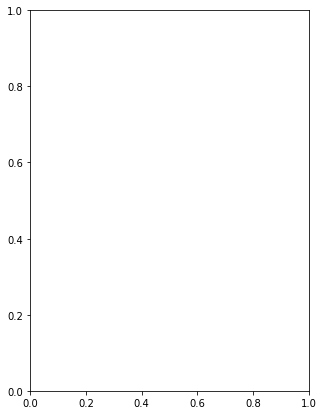

In [48]:
fig, ax = plt.subplots(figsize = (5, 7))
sc.pl.stacked_violin(adata, data_cols, groupby = 'experiment', swap_axes = True, ax = ax, dendrogram = True)
fig.tight_layout()
plt.show()

#### Pseudotime - heatmap

In [49]:
# Enter order of clusters in pseudotime
pseudotime_path = [3,4,7]

IndexError: index 3 is out of bounds for axis 0 with size 2

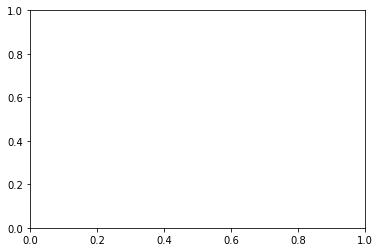

In [50]:
# Heatmap - pseudotime
sc.pl.paga_path(
    adata, 
    pseudotime_path, 
    data_cols,
    show_node_names = True,
    n_avg = 50,
    annotations = ['dpt_pseudotime'],
    show_colorbar = True,
    color_map = 'coolwarm',
    groups_key = 'leiden',
    color_maps_annotations = {'dpt_pseudotime': 'viridis'},
    title = 'Path',
    return_data = False,
    normalize_to_zero_one = True,
    show = True
)

### Save Object

In [ ]:
adata.write("/save/path/filename.hdf5")